In [6]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
from library.IOBenchmark import *
import json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
#def plot_bar(disk_names, results, y_label, title):
def plot_disk_result(root_dir, disk_name):
    def plot_bar(disk_names, results, y_label, title):
        y_pos = np.arange(len(disk_names))
        plt.bar(y_pos, results, align='center', alpha=0.5, width = 0.3, color = 'g')
        plt.xticks(y_pos, disk_names)
        plt.ylabel(y_label)
        plt.title(title)
        for i in range(len(results)):
            plt.text(x = y_pos[i] - 0.1 , y = results[i]+0.2, s = results[i], size = 10)
        plt.show()
        
    bw = []
    p50 = []
    p99 = []
    names = []
    for mode in ["seq", "random"]:
        for rw in ["read", "write"]:
            names.append(f"{mode}-{rw}")
            file_name = f"{root_dir}/fio_{mode}_{rw}_res-performance-result"
            json_res = open(file_name, "r").read()
            dic = json.loads(json_res)["jobs"][0]
            bw.append(dic[rw]["bw"] / 1024)
            p50.append(dic[rw]["clat_ns"]["percentile"]["50.000000"])
            p99.append(dic[rw]["clat_ns"]["percentile"]["99.000000"])
    plot_bar(names, bw, "MB", f"{disk_name}-throughput")
    plot_bar(names, p50, "ns", f"{disk_name}-p50")
    plot_bar(names, p99, "ns", f"{disk_name}-p99")

In [13]:
'''
#local disk command
ioBenchmark = IOBenchmark(8192 * B, 100 * GB, "/mnt", True)
ioBenchmark.run_all_and_dump_files()

#remote disk benchmark command
for test_dir in ["/no_cache", "/read_cache", "/readwrite_cache"]:
    ioBenchmark = IOBenchmark(8192 * B, 20 * GB, test_dir, True)
    ioBenchmark.run_all_and_dump_files()

'''

'\n#local disk command\nioBenchmark = IOBenchmark(8192 * B, 100 * GB, "/mnt", True)\nioBenchmark.run_all_and_dump_files()\n\n#remote disk benchmark command\nfor test_dir in ["/no_cache", "/read_cache", "/readwrite_cache"]:\n    ioBenchmark = IOBenchmark(8192 * B, 20 * GB, test_dir, True)\n    ioBenchmark.run_all_and_dump_files()\n\n'

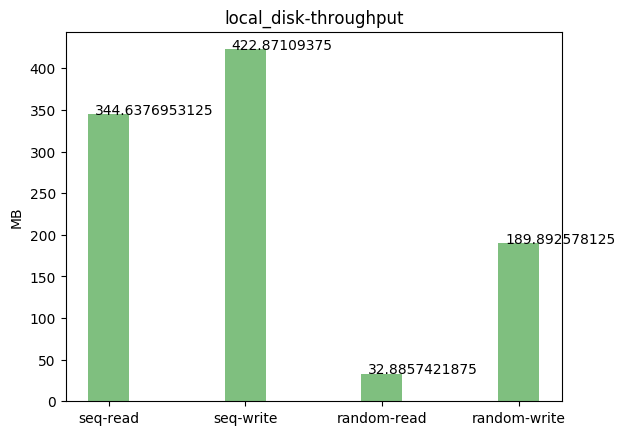

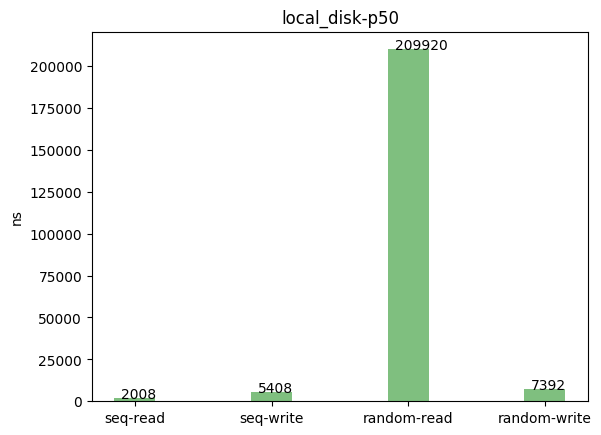

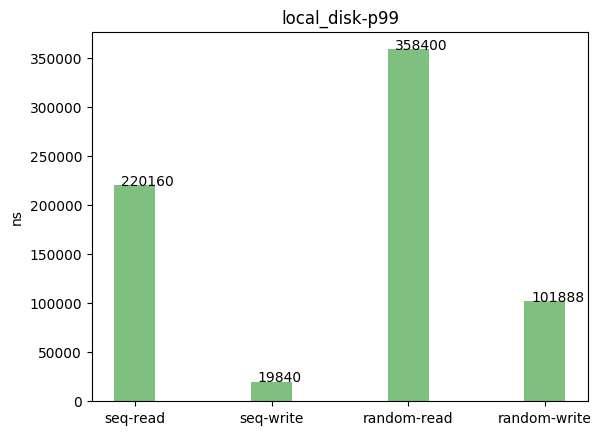

In [9]:
plot_disk_result("/home/fxie/samza-azure-storage/milestone2/results/fio_result/local_disk", 
                 "local_disk")

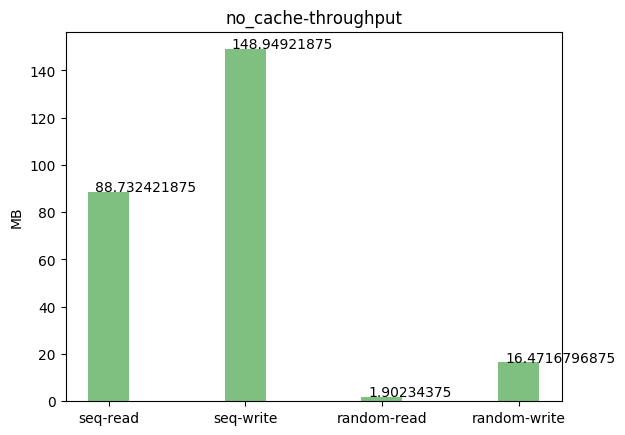

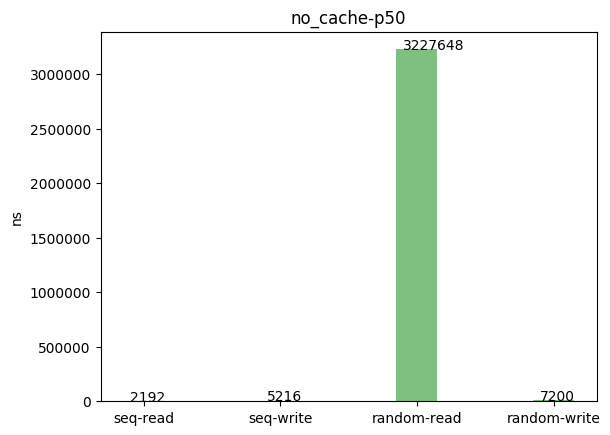

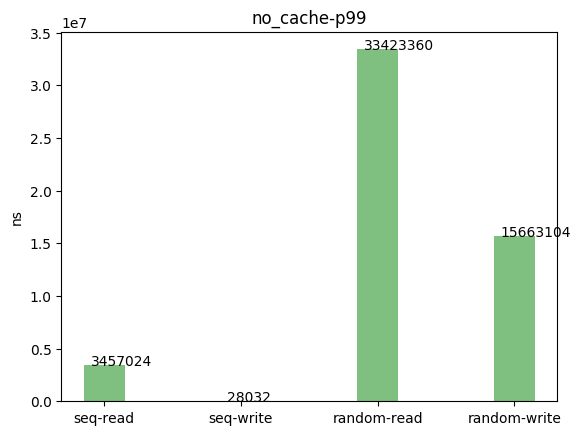

In [10]:
plot_disk_result(f"/home/fxie/samza-azure-storage/milestone2/results/fio_result/no_cache"
                 , "no_cache")

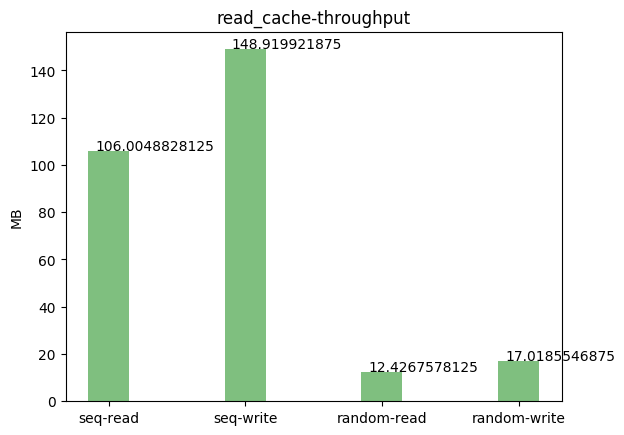

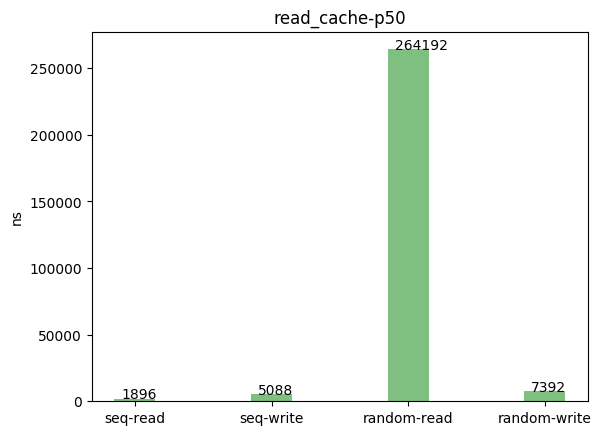

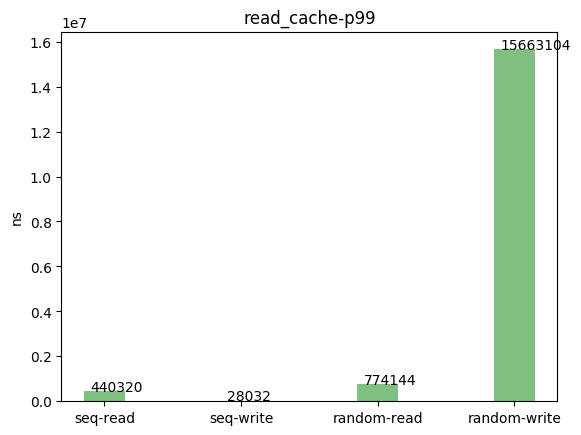

In [11]:
plot_disk_result(f"/home/fxie/samza-azure-storage/milestone2/results/fio_result/read_cache"
                 , "read_cache")

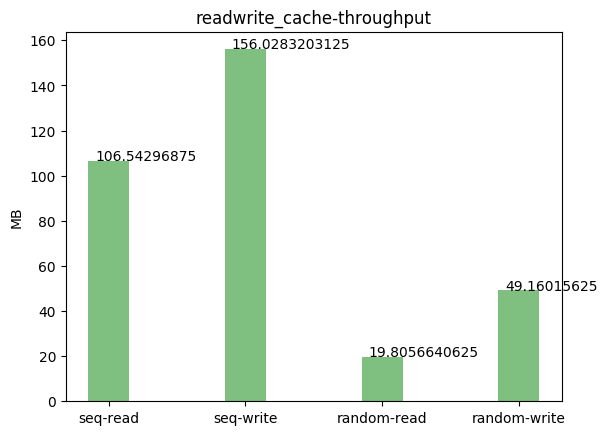

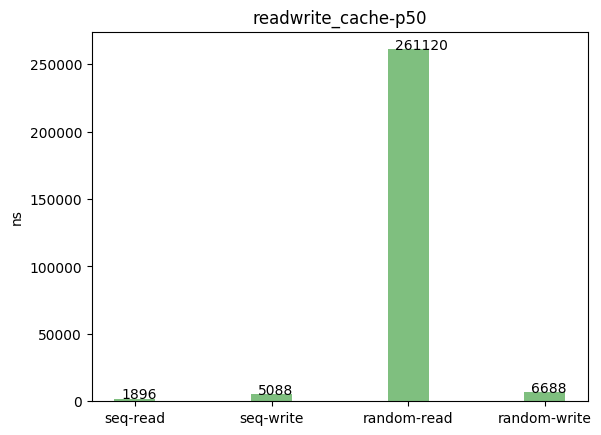

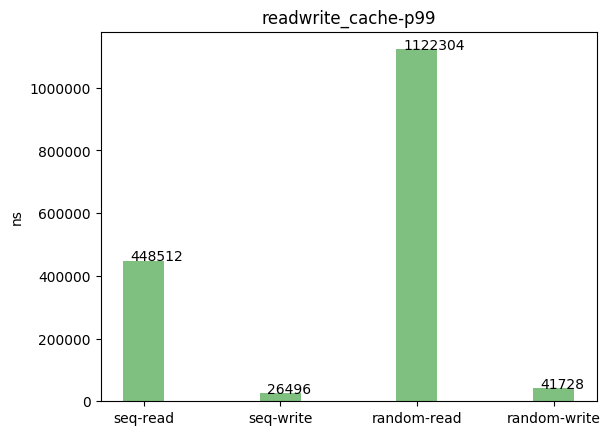

In [12]:
plot_disk_result(f"/home/fxie/samza-azure-storage/milestone2/results/fio_result/readwrite_cache"
                 , "readwrite_cache")